In [2]:
#Importing all needed libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [9]:
#Find current working directory
os.chdir('C://Users/Catharina/Documents/Python Scripts/')

In [10]:
#Reads in txt file and adds headers 
#[TODO] Cath, look at setting a specific type for column 18 
df = pd.read_table('FLAT_RCL.txt', names = ["Record_ID","CAMPNO","MAKETXT","MODELTXT",
                                            "YEARTXT","MFGCAMPNO","COMPNAME","MFGNAME",
                                            "BGMAN","ENDMAN","RCLTYPECD","POTAFF","ODATE",
                                            "INFLUENCED_BY","MFGTXT","RCDATE","DATEA",
                                            "RPNO","FMVSS","DESC_DEFECT","CONEQUENCE_DEFECT",
                                            "CORRECTIVE_ACTION","NOTES","RCL_CMPT_ID"] )

C:\Users\Catharina\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
#display dimensions of dataframe 'df'
df.shape

(123162, 24)

In [12]:
#[TODO] Update sort_values to sort

#converts content of column 'RCDATE' to desired timestamp format
df['Timestamp']=pd.to_datetime(df['RCDATE'],format='%Y%m%d',errors='ignore')


#create a column 'Year' 
df['Year'] = df['Timestamp'].apply(lambda x: "%s" %(x.year))

#sort dataframe by the recall year in order to have 'month/year' groups in chronological order
df=df.sort(columns='Year')

#create 'Month/Year' column to prepare for grouping
df['Week/Year'] = df['Timestamp'].apply(lambda x: "%s/%s" %(x.week, x.year))

C:\Users\Catharina\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [13]:
#if column 'MAKETXT' lists 'MERCEDES' as content, rename to 'MERCEDES BENZ'
df.ix[(df.MAKETXT=='MERCEDES'),['MAKETXT']]='MERCEDES BENZ'

#if column 'MAKETXT' lists 'MERCEDES' as content, rename to 'MERCEDES BENZ'
df.ix[(df.MAKETXT=='MERCEDES-BENZ'),['MAKETXT']]='MERCEDES BENZ'

#Use when you want Audi, BMW, and Mercedes
#What was JL?
df=df[(df['MAKETXT'].str.contains("AUDI|BMW|MERCEDES")==True)
    & (df['MAKETXT'].str.contains("AUDIOVOX")==False)
    & (df['MAKETXT'].str.contains("JL")==False)]

#Use when you want only Mercedes
#df=df[(df['MAKETXT'].str.contains("MERCEDES")==True) & (df['MAKETXT'].str.contains("JL")==False)]

In [24]:
df.dropna(subset=['Timestamp', 'Year'])

,Record_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,RPNO,FMVSS,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID,Timestamp,Year,Week/Year
63813,63814,66V027000,MERCEDES BENZ,C230,9999,NaN,"FUEL SYSTEM, GASOLINE:FUEL INJECTION SYSTEM","MERCEDES-BENZ USA, INC.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE FREEZING CONDITION OF THE THROTTLE VA...,000000043000010057000000154,1966-11-23,1966,47/1966
63812,63813,66V027000,MERCEDES BENZ,250,9999,NaN,"FUEL SYSTEM, GASOLINE:FUEL INJECTION SYSTEM","MERCEDES-BENZ USA, INC.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE FREEZING CONDITION OF THE THROTTLE VA...,000000043000045898000000154,1966-11-23,1966,47/1966
63438,63439,67V012000,BMW,1800,9999,NaN,"SERVICE BRAKES, HYDRAULIC:FOUNDATION COMPONENT...",BAYERISCHE MOTOREN WERKE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE SURFACE DAMAGE TO BRAKE LINES DURING ...,000000076000045965000000073,1967-01-30,1967,5/1967
63437,63438,67V012000,BMW,2000,9999,NaN,"SERVICE BRAKES, HYDRAULIC:FOUNDATION COMPONENT...",BAYERISCHE MOTOREN WERKE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE SURFACE DAMAGE TO BRAKE LINES DURING ...,000000076000045966000000073,1967-01-30,1967,5/1967
57788,57789,67V077000,MERCEDES BENZ,600,1965,NaN,STEERING:HYDRAULIC POWER ASSIST SYSTEM,"MERCEDES-BENZ USA, INC.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE MALFUNCTION OF THE STEERING GEAR UNDE...,000000147000046077000000011,1967-09-18,1967,38/1967
57787,57788,67V077000,MERCEDES BENZ,600,1966,NaN,STEERING:HYDRAULIC POWER ASSIST SYSTEM,"MERCEDES-BENZ USA, INC.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE MALFUNCTION OF THE STEERING GEAR UNDE...,000000147000046078000000011,1967-09-18,1967,38/1967
57786,57787,67V077000,MERCEDES BENZ,600,1967,NaN,STEERING:HYDRAULIC POWER ASSIST SYSTEM,"MERCEDES-BENZ USA, INC.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE MALFUNCTION OF THE STEERING GEAR UNDE...,000000147000046079000000011,1967-09-18,1967,38/1967
57785,57786,67V077000,MERCEDES BENZ,600,1964,NaN,STEERING:HYDRAULIC POWER ASSIST SYSTEM,"MERCEDES-BENZ USA, INC.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE MALFUNCTION OF THE STEERING GEAR UNDE...,000000147000046076000000011,1967-09-18,1967,38/1967
57366,57367,67V054000,MERCEDES BENZ,300 SEL,9999,NaN,ENGINE AND ENGINE COOLING:EXHAUST SYSTEM,"MERCEDES-BENZ USA, INC.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE BREATHER LINE FREEZING.IF THIS CONDIT...,000000124000046024000000138,1967-06-19,1967,25/1967
57367,57368,67V054000,MERCEDES BENZ,300,9999,NaN,ENGINE AND ENGINE COOLING:EXHAUST SYSTEM,"MERCEDES-BENZ USA, INC.",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POSSIBLE BREATHER LINE FREEZING.IF THIS CONDIT...,000000124000010108000000138,1967-06-19,1967,25/1967


In [25]:
#Unstacking from multiindex series back to dataframe
graphdata = df.groupby(by=['Timestamp','MAKETXT'])['POTAFF'].sum()
graphdata = graphdata.reset_index().pivot(index='Timestamp', columns='MAKETXT')
graphdata.index.to_datetime()

#Look at address below for resample docs
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
graphdata = graphdata.resample('5A').sum()

graphdata.head()
graphdata.describe

<bound method DataFrame.describe of                 POTAFF                           
MAKETXT           AUDI          BMW MERCEDES BENZ
Timestamp                                        
1966-12-31         NaN          NaN        4910.0
1971-12-31      3148.0     133590.0      103455.0
1976-12-31     97567.0     307011.0      606481.0
1981-12-31    294925.0     555756.0      273017.0
1986-12-31   7326420.0    2050919.0      257524.0
1991-12-31   3432318.0     773160.0     1721063.0
1996-12-31   6834556.0   17808954.0     1492003.0
2001-12-31   4364177.0   97118017.0      500421.0
2006-12-31   5152177.0    8595439.0     5845877.0
2011-12-31   1625122.0   20407633.0     5320436.0
2016-12-31  13267968.0  168053032.0    61840359.0>

In [26]:
graphdata

POTAFF                           
MAKETXT           AUDI          BMW MERCEDES BENZ
Timestamp                                        
1966-12-31         NaN          NaN        4910.0
1971-12-31      3148.0     133590.0      103455.0
1976-12-31     97567.0     307011.0      606481.0
1981-12-31    294925.0     555756.0      273017.0
1986-12-31   7326420.0    2050919.0      257524.0
1991-12-31   3432318.0     773160.0     1721063.0
1996-12-31   6834556.0   17808954.0     1492003.0
2001-12-31   4364177.0   97118017.0      500421.0
2006-12-31   5152177.0    8595439.0     5845877.0
2011-12-31   1625122.0   20407633.0     5320436.0
2016-12-31  13267968.0  168053032.0    61840359.0

KeyError: 'MAKETXT'

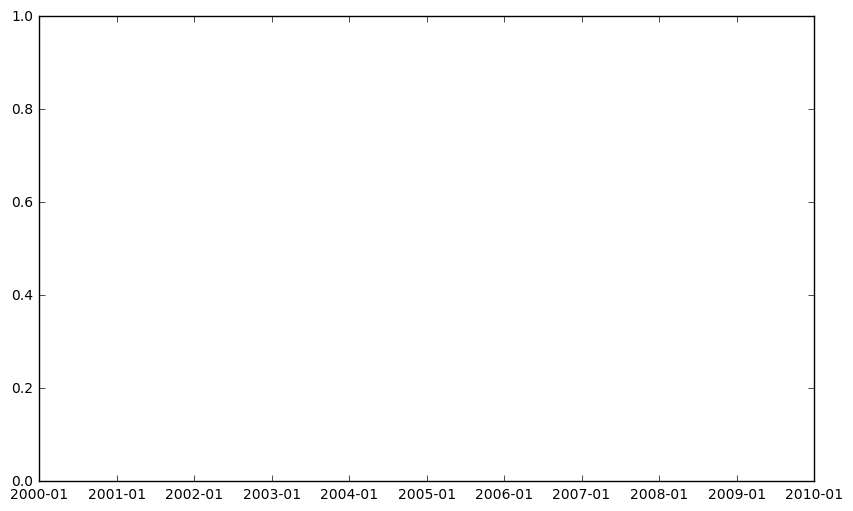

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis_date()
ax.bar(graphdata.index, graphdata['MAKETXT'])

In [27]:
'''
fig=plt.figure()
ax=fig.add_subplot(111)
N=11

AudiData=graphdata['POTAFF,Audi']
BMWData=graphdata['POTAFF,BMW']

ind = np.arange(N)
width=0.35

Audi=ax.bar(ind,AudiData,width,
             color='black',
             error_kw=dict(elinewidth=2,ecolor='blue'))

BMW=ax.bar(ind+width,BMWData,width,
             color='blue',
             error_kw=dict(elinewidth=2,ecolor='black'))

ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,40)
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles by MB and Market')
xTickMarks=['Recall'+str(i) for i in range (1,5)]
ax.set_xticks(ind+width)
xtickNames=ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.legend((Audi[0], BMW[0]), ('MB', 'Market'))

plt.show()

'''

"\nfig=plt.figure()\nax=fig.add_subplot(111)\nN=11\n\nAudiData=graphdata['POTAFF,Audi']\nBMWData=graphdata['POTAFF,BMW']\n\nind = np.arange(N)\nwidth=0.35\n\nAudi=ax.bar(ind,AudiData,width,\n             color='black',\n             error_kw=dict(elinewidth=2,ecolor='blue'))\n\nBMW=ax.bar(ind+width,BMWData,width,\n             color='blue',\n             error_kw=dict(elinewidth=2,ecolor='black'))\n\nax.set_xlim(-width,len(ind)+width)\nax.set_ylim(0,40)\nax.set_ylabel('Number of Vehicles')\nax.set_title('Number of Vehicles by MB and Market')\nxTickMarks=['Recall'+str(i) for i in range (1,5)]\nax.set_xticks(ind+width)\nxtickNames=ax.set_xticklabels(xTickMarks)\nplt.setp(xtickNames, rotation=45, fontsize=10)\n\nax.legend((Audi[0], BMW[0]), ('MB', 'Market'))\n\nplt.show()\n\n"

In [35]:
#Graphing section
ax = graphdata.plot(kind='bar', figsize= (7,7))
ax.legend(loc=2,prop={'size':6})
ax.set_yscale('log')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig = ax.get_figure()
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("# of Vehicles", fontsize=12)
fig.suptitle('Recalled Vehicles over time', fontsize=20)
ax.fmt_xdata = mdates.DateFormatter('%Y')
ax.legend(["Audi","BMW","Mercedes"], fontsize=8)
#ax.xaxis.grid(True, which="minor")
fig.autofmt_xdate()
#fig.savefig("output.pdf")

ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

In [29]:
mdates.Date

AttributeError: 'module' object has no attribute 'Date'